# Multilayer Perceptron (Image Classification Analysis)

+ Requirements:
    1. The estimated time to carry out this activity is approximately 1 hour.
<br><br>
+ Objectives of the notebook:
    1. Introduction to Pytorch
    2. Understand how to apply multilayer perceptron to image classification
<br><br>
+ Summary of activities:
    1. To achieve these objectives, we will analyze pieces of code in Pytorch.
<br><br>

%%latex
\tableofcontents
\newpage

<a id='Introduccion7'></a>

<a id='Ejemplos7'></a>

# Sample code in Pytorch
Below is a Pytorch code example of a perceptron and its training to classify the digits of the MNIST dataset.

- In Python you always start by importing all the required modules:

In [1]:
import numpy as np
import torch
import torchvision
import matplotlib.pyplot as plt
from time import time
from torchvision import datasets, transforms
from torch import nn, optim

<a id='Dataset7'></a>

- The dataset is created with the input data and the outputs of the function (or labels).

In [2]:
path, name, epochs = 'datasets/MNIST/', 'mnist', 10 # training time -> approx. 1 minute per epoch
my_batch_size=64

transform = transforms.Compose([transforms.ToTensor(),
                              transforms.Normalize((0.5,), (0.5,)),
                              ])

trainset = datasets.MNIST('datasets/MNIST/train', download=True, train=True, transform=transform)
valset = datasets.MNIST('datasets/MNIST/test', download=True, train=False, transform=transform)
n_classes = len(valset.classes)
total_samples = trainset.__len__() + valset.__len__()
print('Total {:.0f} Train {:.0f}% - Validation: {:.0f}% samples'.format(total_samples, trainset.__len__()*100/total_samples,valset.__len__()*100/total_samples))

my_loader = torch.utils.data.DataLoader(trainset, batch_size=my_batch_size, shuffle=True)
my_loader_train = torch.utils.data.DataLoader(trainset, batch_size=my_batch_size)
my_loader_validation = torch.utils.data.DataLoader(valset, batch_size=my_batch_size, shuffle=True)

# dataiter = iter(my_loader)
# images, labels = dataiter.next()
# print(images.shape)
# print(labels.shape)
#
# plt.imshow(images[0].numpy().squeeze(), cmap='gray_r')
# plt.show()
#
# figure = plt.figure()
# num_of_images = 60
# for index in range(1, num_of_images + 1):
#     plt.subplot(6, 10, index)
#     plt.axis('off')
#     plt.imshow(images[index].numpy().squeeze(), cmap='gray_r')
# plt.show()


Total 70000 Train 86% - Validation: 14% samples


- Taking advantage of the functionality of Pytorch, a multilayer model is defined:

In [3]:
input_size = 784
hidden_sizes = [128, 64]
output_size = 10
model = nn.Sequential(nn.Linear(input_size, hidden_sizes[0]),
                      nn.ReLU(),
                      nn.Linear(hidden_sizes[0], hidden_sizes[1]),
                      nn.ReLU(),
                      nn.Linear(hidden_sizes[1], output_size),
                      nn.LogSoftmax(dim=1))

# The model is displayed
print(model)

Sequential(
  (0): Linear(in_features=784, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=10, bias=True)
  (5): LogSoftmax(dim=1)
)


The model parameters are estimated:

In [4]:
def get_accuracy(my_model, my_loader):
    ''' Function for returning accuracy of a model for a mnist loader data.
    '''
    correct_count, all_count = 0, 0
    for images, labels in my_loader:
        for i in range(len(labels)):
            img = images[i].view(1, 784)
            with torch.no_grad():
                logps = my_model(img)

            ps = torch.exp(logps)
            probab = list(ps.numpy()[0])
            pred_label = probab.index(max(probab))
            true_label = labels.numpy()[i]
            if (true_label == pred_label):
                correct_count += 1
            all_count += 1
    return(correct_count / all_count)

def view_classify(img, ps):
    ''' Function for viewing an image and it's predicted classes.
    '''
    ps = ps.data.numpy().squeeze()

    fig, (ax1, ax2) = plt.subplots(figsize=(6,9), ncols=2)
    ax1.imshow(img.resize_(1, 28, 28).numpy().squeeze())
    ax1.axis('off')
    ax2.barh(np.arange(10), ps)
    ax2.set_aspect(0.1)
    ax2.set_yticks(np.arange(10))
    ax2.set_yticklabels(np.arange(10))
    ax2.set_title('Class Probability')
    ax2.set_xlim(0, 1.1)
    plt.tight_layout()
    plt.show()

Epoch 0 - Training loss: 0.6637 - Validation accuracy: 0.9136 at iter 938 *
Epoch 1 - Training loss: 0.2856 - Validation accuracy: 0.9296 at iter 1876 *
Epoch 2 - Training loss: 0.2163 - Validation accuracy: 0.9434 at iter 2814 *
Epoch 3 - Training loss: 0.1720 - Validation accuracy: 0.9551 at iter 3752 *
Epoch 4 - Training loss: 0.1440 - Validation accuracy: 0.9576 at iter 4690 *
Epoch 5 - Training loss: 0.1251 - Validation accuracy: 0.9624 at iter 5628 *
Epoch 6 - Training loss: 0.1092 - Validation accuracy: 0.9631 at iter 6566 *
Epoch 7 - Training loss: 0.0967 - Validation accuracy: 0.9675 at iter 7504 *
Epoch 8 - Training loss: 0.0878 - Validation accuracy: 0.9678 at iter 8442 *
Epoch 9 - Training loss: 0.0801 - Validation accuracy: 0.9702 at iter 9380 *

Training Time (in minutes) = 12.425046972433726


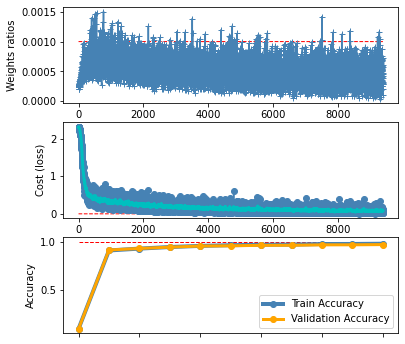

In [5]:
criterion = nn.NLLLoss()

learning_rate = 0.003
optimizer = optim.SGD(model.parameters(), lr=learning_rate, momentum=0.9)

# Supervised Training.
time0 = time()

best_validation_accuracy = 0.
max_iter = my_loader.__len__()*epochs
cost = np.zeros((max_iter, 1))
ucost = np.zeros((max_iter, 1))
acc = []
acc.append([get_accuracy(model, my_loader_train), get_accuracy(model, my_loader_validation)])
weight_ratios = np.zeros((max_iter, 1))
t, c_ant, beta = 0, 0, 0.9

for e in range(epochs):
    running_loss = 0
    for k, (images, labels) in enumerate(my_loader):
        # Flatten MNIST images into a 784 long vector
        images = images.view(images.shape[0], -1)

        # Training pass
        optimizer.zero_grad()

        output = model(images)
        loss = criterion(output, labels)

        # This is where the model learns by backpropagating
        # Gradient calculation.
        weights = model[0].weight.data.numpy().ravel()
        loss.backward()
        grads_lr = model[0].weight.grad.numpy().ravel() * learning_rate
        weight_ratios[t] = np.linalg.norm(grads_lr) / np.linalg.norm(weights)

        # Plot loss y su media movil
        # cost[t] = loss.detach().numpy()
        cost[t] = loss.item()
        c_act = (1-beta)*cost[t] + beta * c_ant
        ucost[t]= c_act / (1-beta**(t+1))
        c_ant = c_act
        t+=1

        # # Print loss every 10 iterations.
        # if k % 10 == 0:
        #     print('Loss {:.4f} at iter {:d}'.format(loss.item(), t))

        # And optimizes its weights here
        optimizer.step()

        running_loss += loss.item()
    else:
        train_accuracy = get_accuracy(model, my_loader_train)
        validation_accuracy = get_accuracy(model, my_loader_validation)
        acc.append([train_accuracy, validation_accuracy])

        best = ' '
        if (validation_accuracy >= best_validation_accuracy):
            best = '*'
            loss_bestmodel = running_loss / len(my_loader)
            iter_bestmodel = t
            torch.save(model, path + name + '_model.pth')
            best_validation_accuracy = validation_accuracy

        print('Epoch {:d} - Training loss: {:.4f} - Validation accuracy: {:.4f} at iter {:d} {:s}'.format(e, running_loss / len(my_loader), validation_accuracy, t, best))

print("\nTraining Time (in minutes) =", (time() - time0) / 60)

# Now, we plot the optimization results.
fig, ax = plt.subplots(3, 1, figsize=(6,6))
ax[0].plot(range(max_iter), np.ones(max_iter)*0.001,'r', linewidth=1, ls='--')
ax[0].plot(range(max_iter), weight_ratios, color='steelblue', marker='+')
ax[0].set_xlabel("Iterations")
ax[0].set_ylabel("Weights ratios")
# Plot the loss C.
ax[1].plot(range(max_iter), np.zeros(max_iter),'r', linewidth=1, ls='--')
ax[1].plot(range(max_iter), cost, color='steelblue', marker='o')
ax[1].plot(range(max_iter), ucost,'c-', linewidth=3)
ax[1].set_xlabel("Iterations")
ax[1].set_ylabel("Cost (loss)")
# Plot the accuracies
acc_train = np.array(acc)[:,0]
acc_validation = np.array(acc)[:,1]
ax[2].plot(range(len(acc_train)), np.ones(len(acc_train)),'r', linewidth=1, ls='--')
ax[2].plot(acc_train, color='steelblue', marker='o', linewidth=4.0, label='Train Accuracy')
ax[2].plot(acc_validation, color='orange', marker='o', linewidth=3.0, label='Validation Accuracy')
ax[2].set_xticklabels([])
ax[2].set_ylabel("Accuracy")
ax[2].legend()
plt.show(block=True)


- The trained model is evaluated:

In [6]:
model = torch.load(path + name + '_model.pth')
model.eval()
print("Number Of Validatrion Images =", valset.__len__())
print("\nValidation Accuracy =", best_validation_accuracy)

Number Of Validatrion Images = 10000

Validation Accuracy = 0.9702


Predicted Digit = 9


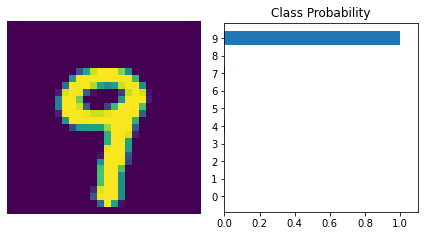

In [7]:
images, labels = next(iter(my_loader_validation))
img = images[0].view(1, 784)
with torch.no_grad():
    logps = model(img)

ps = torch.exp(logps)
probab = list(ps.numpy()[0])
print("Predicted Digit =", probab.index(max(probab)))
view_classify(img.view(1, 28, 28), ps)


In [8]:
# what are the classes that performed well, and the classes that did not perform well
class_correct = list(0. for i in range(n_classes))
class_total = list(0. for i in range(n_classes))
with torch.no_grad():
    for data in my_loader_validation:
        images, labels = data
        
        # Flatten MNIST images into a 784 long vector
        images = images.view(images.shape[0], -1)
        
        outputs = model(images)
        _, predicted = torch.max(outputs, 1)
        c = (predicted == labels).squeeze()
        for i in range(len(labels)):
            label = labels[i]
            class_correct[label] += c[i].item()
            class_total[label] += 1

for i in range(n_classes):
    print('Accuracy of class%2d : %2d %%' % (i, 100 * class_correct[i] / class_total[i]))

Accuracy of class 0 : 99 %
Accuracy of class 1 : 99 %
Accuracy of class 2 : 97 %
Accuracy of class 3 : 96 %
Accuracy of class 4 : 97 %
Accuracy of class 5 : 96 %
Accuracy of class 6 : 96 %
Accuracy of class 7 : 95 %
Accuracy of class 8 : 95 %
Accuracy of class 9 : 96 %


# References
+ [Python documentation](https://docs.python.org/es/3/)
+ [Numpy documentation](https://numpy.org/doc/)
+ [OpenCV documentation](https://docs.opencv.org/4.4.0/d9/df8/tutorial_root.html)
+ [Pytorch documentation](https://pytorch.org/docs/stable/index.html)